In [1]:
import os
import cv2 
import numpy as np
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import cm
from src.Image_processing_functions import load, resize, random_crop, normalize, random_jitter,create_draw_edge_mask
from src.Image_processing_functions import load_image_train, load_image_test, get_concat_h, rename_photo_in_folder
from src.Image_processing_functions import BUFFER_SIZE, BATCH_SIZE, IMG_WIDTH, IMG_HEIGHT

# Create mask example

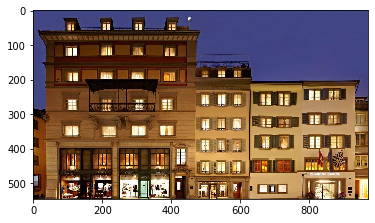

In [3]:
# open image example
img = cv2.imread('imagenes/de_convertir/FaSyn/FaSyn13/images/1.jpg')[:,:,::-1]
plt.figure()
plt.imshow(img)

### 1 - edge Mask

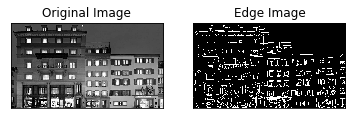

In [4]:
img = cv2.imread('imagenes/de_convertir/FaSyn/FaSyn13/images/1.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### 2 - deep Mask

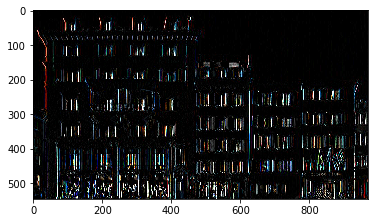

In [6]:
img = cv2.imread('imagenes/de_convertir/FaSyn/FaSyn13/images/1.jpg')

kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
edges = cv2.filter2D(img,cv2.CV_8U,kernelx)
edges_y = cv2.filter2D(img,cv2.CV_8U,kernely)
plt.imshow(edges,cmap = 'gray')
#cv2.imshow('Gradients_X',edges)
#cv2.imshow('Gradients_Y',edges_y)
#cv2.waitKey(0)

### 3 - Concatenate original photo to mask

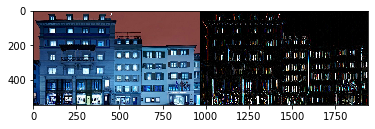

In [7]:
PIL_image = Image.fromarray(np.uint8(img)).convert('RGB')
PIL_image2 = Image.fromarray(np.uint8(edges)).convert('RGB')
img_concat = get_concat_h(PIL_image, PIL_image2)
plt.imshow(img_concat)

In [ ]:
#https://machinelearningmastery.com/how-to-develop-a-pix2pix-gan-for-image-to-image-translation/
# https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix -> other method to merge photo and mask

# Create Mask, Concatenate and prepare train/test data. pipeline code

In [3]:
# to find how many files there are in the folder 
lista = os.listdir('Test_foto_barocco/without_mask') # dir is your directory path
number_files = len(lista)
print(number_files)

5


In [4]:
path = 'Test_foto_barocco/without_mask'
destination = 'Test_foto_barocco/with_mask'

In [5]:
# call the function to rename all photo in a specific folder
rename_photo_in_folder(path)
# create the mask, concatenate and save files in a new folder
create_draw_edge_mask(path, destination, number_files)

In [ ]:
# Call the load_image_train function that automate the whole process of loading test images.
# Input images 512 pixel 256*2
# Separate real image from input image
# Resize las dos imagenes con el metodo de los NEAREST_NEIGHBOR
# Appy a random_jitter
# Finally normalizing the images to [-1, 1]
train_dataset = tf.data.Dataset.list_files('images/all_photo/with_mask/*.png')
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

In [ ]:
test_dataset = tf.data.Dataset.list_files('images/Gothic/with_mask/*.png')
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)